# Interploation Techniques

In [3]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

We can roughly divide any kind of data into two categories: temporal and timeless. Timeless data are quite common in the most commonly used datasets in data science tutorials: such as features of Titanic survivors, flower petal sizes, or tumor characteristics. Data may have temporal data, such as the moment when the user has made a determined attitude, but time is a secondary feature of the data, and not its essence.

When dealing with temporal data, on the other hand, the moment (time) when those data were created are extremely important. Classic examples are dólar value through the day or the number of users per hour in a website.

When a timeless data has missing data, we usually are taught that the simplest way is to remove that data row from our dataset. It is best to remove the data because many algorithms can’t make analysis with missing data and, most cases, the data are abundant enough to have little to no impact on removing a few lines.

When we are talking about temporal data, the removal of a data can be very troubling. These type of data need pattern, specially if we must do a frequency analysis. So, which alternatives we have then? This text is precisely to talk about them 

## Temporal Data

We will use the following data to analyze. We have a pretty simple data that has a senoidal shape. We know, before anything, that this data doesn’t have abrupt variations and that it should be received in regular time intervals. We can see, then, that the nineth element was lost and this is the data we will focus to fullfil.

In [14]:
# create array
num_of_records = 20

x = pd.Series(np.linspace(0, 2 * np.pi, num_of_records))
y = pd.Series(20 * np.sin(x))

Text(0.5, 1.0, 'Original Signal Recieved')

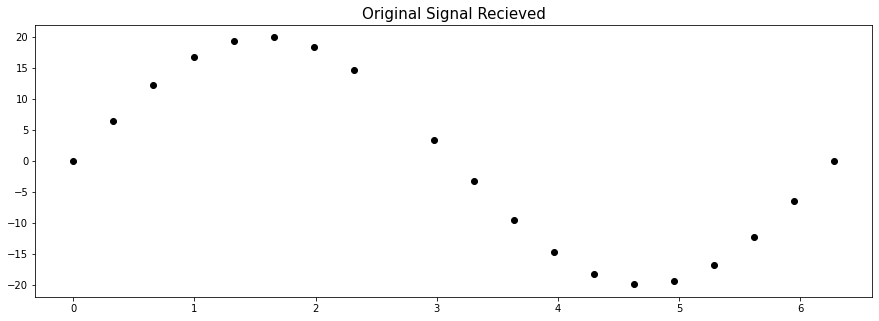

In [15]:
# choose item to be removed
i = 8

# keep original values
y_original = y[i]

# remove values from our data
y[i] = np.nan

# Plot the signal recieved
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.title('Original Signal Recieved', fontsize=15)

The original data is in red:

Text(0.5, 1.0, 'Original Signal Send')

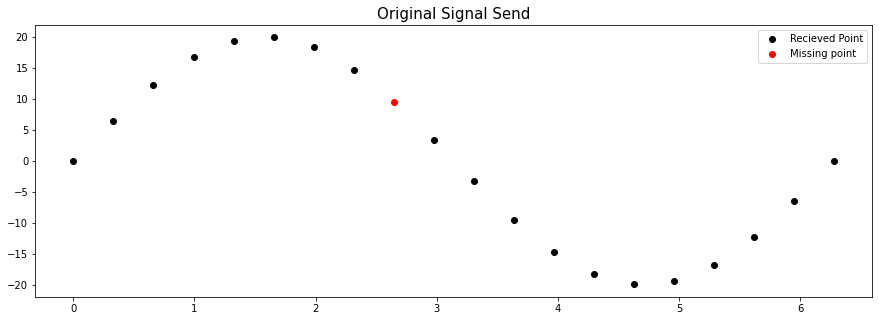

In [16]:
# Plot the original Data
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.legend(['Recieved Point', 'Missing point'])
plt.title('Original Signal Send', fontsize=15)

### Fill with mean

If we think that our data doesn't fit in a linear pattern, we could use a strategy that will not modify our main statistics, such as replacing it by its average

10.019945116569971


Text(0.5, 1.0, 'Temporal Signal -  Mean')

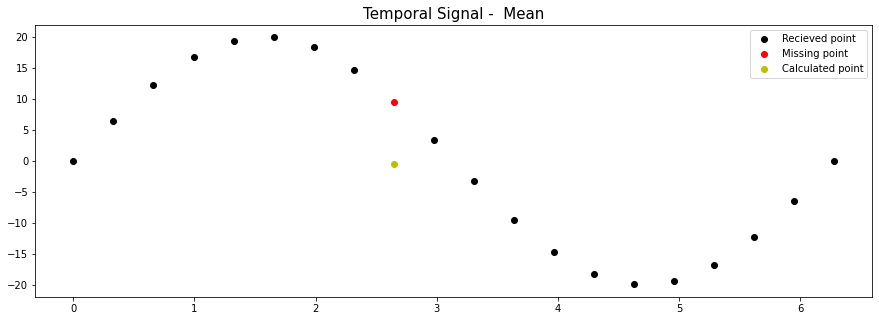

In [24]:
# Calculate mean
yi_calculated = y.mean()

print(y_original - yi_calculated)
# plot data
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.plot(x[i], yi_calculated, 'oy')

plt.legend(['Recieved point', 'Missing point', 'Calculated point'])
plt.title('Temporal Signal -  Mean', fontsize=15)

### Linear Interpolation

If our signal is typical linear signal (or close to it) we can simply get the mean of the value before and the value after. Since our curve is not linear, we have a small difference, but still close enough to make this predicted value very good for us.

0.5157628512028154


Text(0.5, 1.0, 'Temporal Signal - Linear Intepolation')

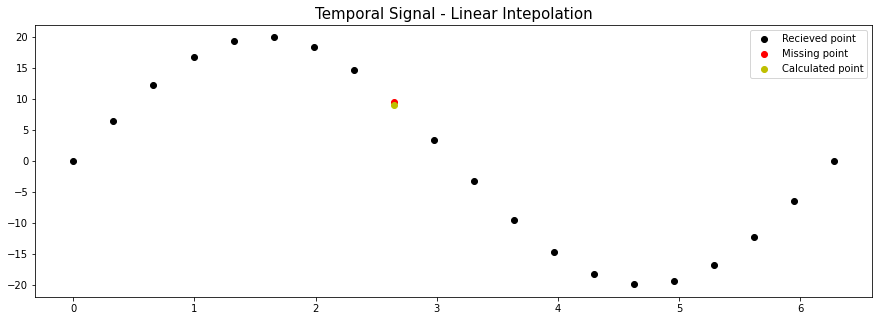

In [20]:
yi_calculated = np.mean([y[i-1], y[i+1]])

print(y_original - yi_calculated)

#Plot data
plt.figure(figsize=(15,5))
plt.plot(x, y, 'ok')
plt.plot(x[i], y_original, 'or')
plt.plot(x[i], yi_calculated, 'oy')

plt.legend(['Recieved point', 'Missing point', 'Calculated point'])
plt.title('Temporal Signal - Linear Intepolation', fontsize=15)

## Interpolation when data pattern is unknown

It is important to say that not all temporal signals have a clear pattern such as that we just saw. So, let’s take a look to a second temporal series.

Text(0.5, 1.0, 'Random signal with no pattern')

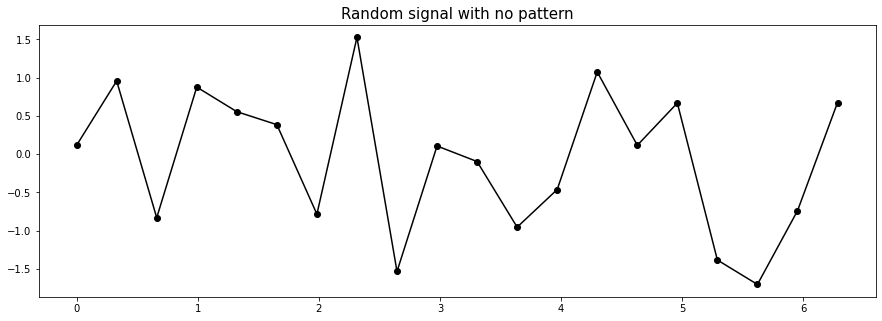

In [39]:
# create random dataset with o pattern
noise = pd.Series([ 0.11604849,  0.9568581 , -0.83154595,  0.87675812,  0.55517057,
                    0.38539126, -0.78490851,  1.52722683, -1.53470131,  0.10656216,
                   -0.09696747, -0.95508694, -0.46314156,  1.07489003,  0.11527739,
                    0.66840295, -1.38479986, -1.70442386, -0.74144102,  0.67423001])

# Plot data
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x, noise, '-k')

plt.title('Random signal with no pattern', fontsize=15)

In this case, we don’t know the pattern and we can’t predict for sure the data that was lost and we can’t predict the low value it actually had. Thus, linear interpolation may not be the best choice:

Text(0.5, 1.0, 'Random Signal - Recieved')

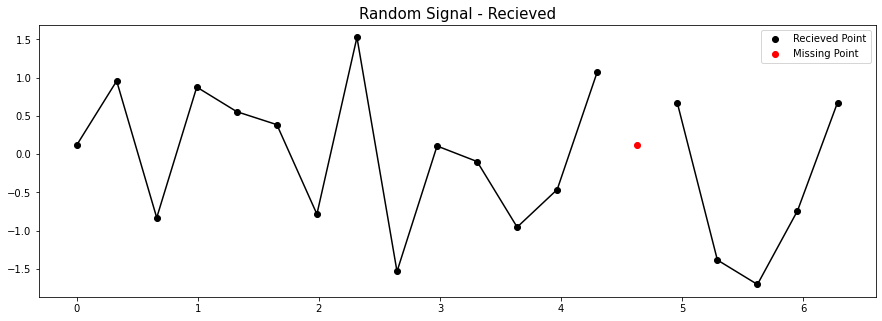

In [43]:
# Making missing point in the signal
i = 14
noise_original = noise[i]
noise[i] = np.nan

#Plot Data
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x, noise, '-k')

plt.legend(['Recieved Point', 'Missing Point'])
plt.title('Random Signal - Recieved', fontsize=15)

### Use Linear Interpolation

In this case, we don’t know the pattern and we can’t predict for sure the data that was lost and we can’t predict the low value it actually had. Thus, linear interpolation may not be the best choice:

Text(0.5, 1.0, 'Random Signal - Linear Interpolation')

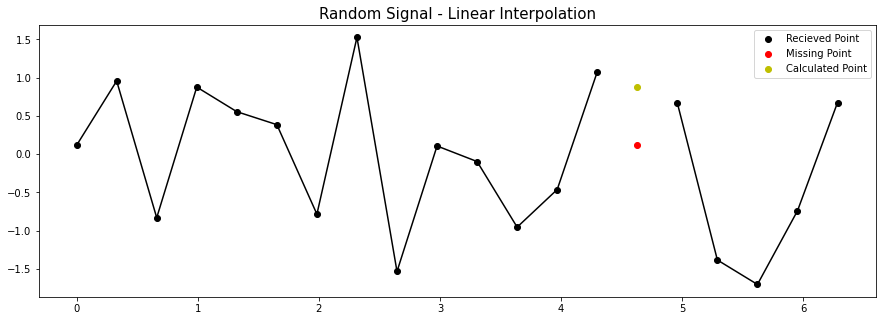

In [48]:
noise_interpolate = noise.interpolate()
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_interpolate[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['Recieved Point', 'Missing Point', 'Calculated Point'])
plt.title('Random Signal - Linear Interpolation', fontsize=15)

So, this doesn't sound good...

One possible strategy is to replace all missing values by the mean value of the series. Unfortunately, this strategy can severely distort the distribution for this variable, leading to complications with summary measures including, notably, underestimates of the standard deviation.

In [49]:
print('Mean before interp:', noise.mean())
print('Mean after interp:', noise.interpolate().mean())
comparison = pd.DataFrame({'original': noise, 'interpolated': noise_interpolate})
comparison.describe()

Mean before interp: -0.08186726105263156
Mean after interp: -0.034191573500000016


,original,interpolated
count,19.000000,20.000000
mean,-0.081867,-0.034192
std,0.960297,0.958695
min,-1.704424,-1.704424
25%,-0.808227,-0.796568
50%,0.106562,0.111305
75%,0.671316,0.723584
max,1.527227,1.527227


### Fill with mean

Thus, we can use the mean value of the series as an approximation, to fill our data and keep our mean just the same! On our example, the values were a pretty good approximation, but things could not be as good.

In this case filling the missing value with the mean value of the series makes more sense! Since no data will actually predict the missing value, the value of the mean will keep the data align to its overall behavior and you get your continuity back. Depending on which kind of analysis you want to do, this could be exactly what you need.

Text(0.5, 1.0, 'Random Signal - Filling with Mean')

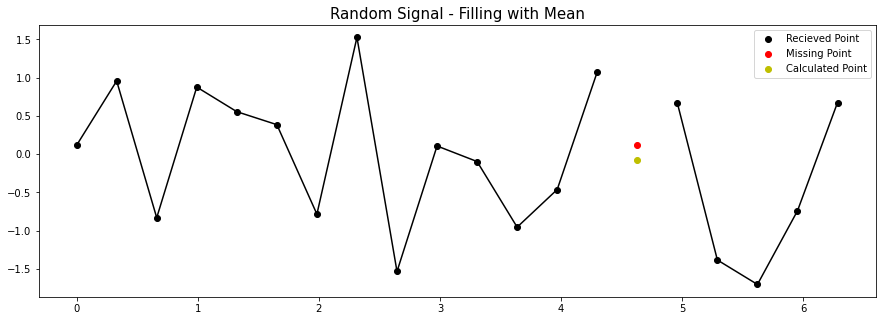

In [50]:
# Fill value with the mean
noise_fillna = noise.fillna(noise.mean())

# Plot Data
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_fillna[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['Recieved Point', 'Missing Point', 'Calculated Point'])
plt.title('Random Signal - Filling with Mean', fontsize=15)

In [51]:

comparison = pd.DataFrame({'original': noise, 'filled': noise_fillna})
comparison.describe()

,original,filled
count,19.000000,20.000000
mean,-0.081867,-0.081867
std,0.960297,0.934685
min,-1.704424,-1.704424
25%,-0.808227,-0.796568
50%,0.106562,0.012347
75%,0.671316,0.669860
max,1.527227,1.527227


### Filling with other 

#### Filling with last value

Another option is to replace the missing data with data that surrounds it. We can, for instance, replace for the previous data. This technique is called Forward Fill because it propagates existent data forward.

Text(0.5, 1.0, 'Random Signal - Filling with Last Value')

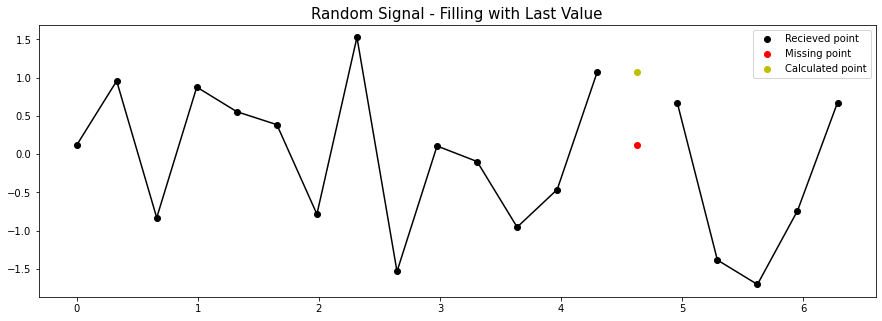

In [52]:
# Get the last value and fill with it
noise_ffill = noise.fillna(method='ffill')

plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_ffill[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['Recieved point', 'Missing point', 'Calculated point'])
plt.title('Random Signal - Filling with Last Value', fontsize=15)


#### Filling with next point

We can do the opposite as well, it is called Backward Fill:

Text(0.5, 1.0, 'Random Signal - Filling with Next Value')

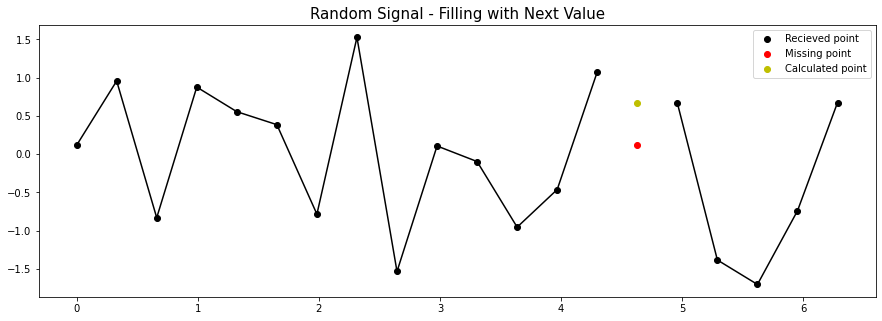

In [53]:
# fill with next point
noise_bfill = noise.fillna(method='bfill')

# plot data
plt.figure(figsize=(15,5))
plt.plot(x, noise, 'ok')
plt.plot(x[i], noise_original, 'or')
plt.plot(x[i], noise_bfill[i], 'oy')
plt.plot(x, noise, '-k')

plt.legend(['Recieved point', 'Missing point', 'Calculated point'])
plt.title('Random Signal - Filling with Next Value', fontsize=15)


In [54]:
comparison = pd.DataFrame({
    'original': noise, 
    'interpolacao_linear': noise_interpolate,
    'preenchimento_com_media': noise_fillna,
    'preenchimento_com_proximo_dado': noise_bfill,
    'preenchimento_com_dado_anterior': noise_ffill
})
comparison.describe()

,original,interpolacao_linear,preenchimento_com_media,preenchimento_com_proximo_dado,preenchimento_com_dado_anterior
count,19.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.081867,-0.034192,-0.081867,-0.044354,-0.024029
std,0.960297,0.958695,0.934685,0.949622,0.969815
min,-1.704424,-1.704424,-1.704424,-1.704424,-1.704424
25%,-0.808227,-0.796568,-0.796568,-0.796568,-0.796568
50%,0.106562,0.111305,0.012347,0.111305,0.111305
75%,0.671316,0.723584,0.669860,0.669860,0.724862
max,1.527227,1.527227,1.527227,1.527227,1.527227


In [56]:
comparison = pd.DataFrame({
    'original': noise, 
    'interpolacao_linear': noise_interpolate,
    'preeenchimento_com_media': noise_fillna,
})
comparison.describe()

,original,interpolacao_linear,preeenchimento_com_media
count,19.000000,20.000000,20.000000
mean,-0.081867,-0.034192,-0.081867
std,0.960297,0.958695,0.934685
min,-1.704424,-1.704424,-1.704424
25%,-0.808227,-0.796568,-0.796568
50%,0.106562,0.111305,0.012347
75%,0.671316,0.723584,0.669860
max,1.527227,1.527227,1.527227


### Which to use?
Hard to say. If your data has a known pattern, probably some kind of interpolation will fit better. However, if the pattern is unknown, I recommend you to evaluate the analysis you want to make and choose the best method for it or the one that gives you the best result :)